In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict 

In [83]:
N = 100
V = 200
b = np.zeros(shape=(N,N))
upper_triangle = np.triu_indices(N,1)

indexes = np.arange(0, len(upper_triangle[0]))
indexes = np.random.choice(indexes, V, replace=False)

for i in indexes:
    idx1 = upper_triangle[0][i]
    idx2 = upper_triangle[1][i]
    b[idx1,idx2] = 1

adj_matrix = (b + b.T)

In [84]:
adj_list = defaultdict(list)

for i in range(N):
    for j in range(N):
        adj_list[i].append(j) if adj_matrix[i, j] == 1 else next

In [85]:
num_rows = 2
rand_indexes = np.random.randint(0, N, size=num_rows) 

print('Adjacency matrix rows')
filtered_matrix = adj_matrix[rand_indexes]

for idx in range(num_rows):
    print(f'{rand_indexes[idx]} -> {filtered_matrix[idx]}')

print('\nAdjacency list rows')
for idx in range(num_rows):
    print(f'{rand_indexes[idx]} -> {adj_list[rand_indexes[idx]]}')

Adjacency matrix rows
76 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
1 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Adjacency list rows
76 -> [31, 33, 96]
1 -> [19, 44]


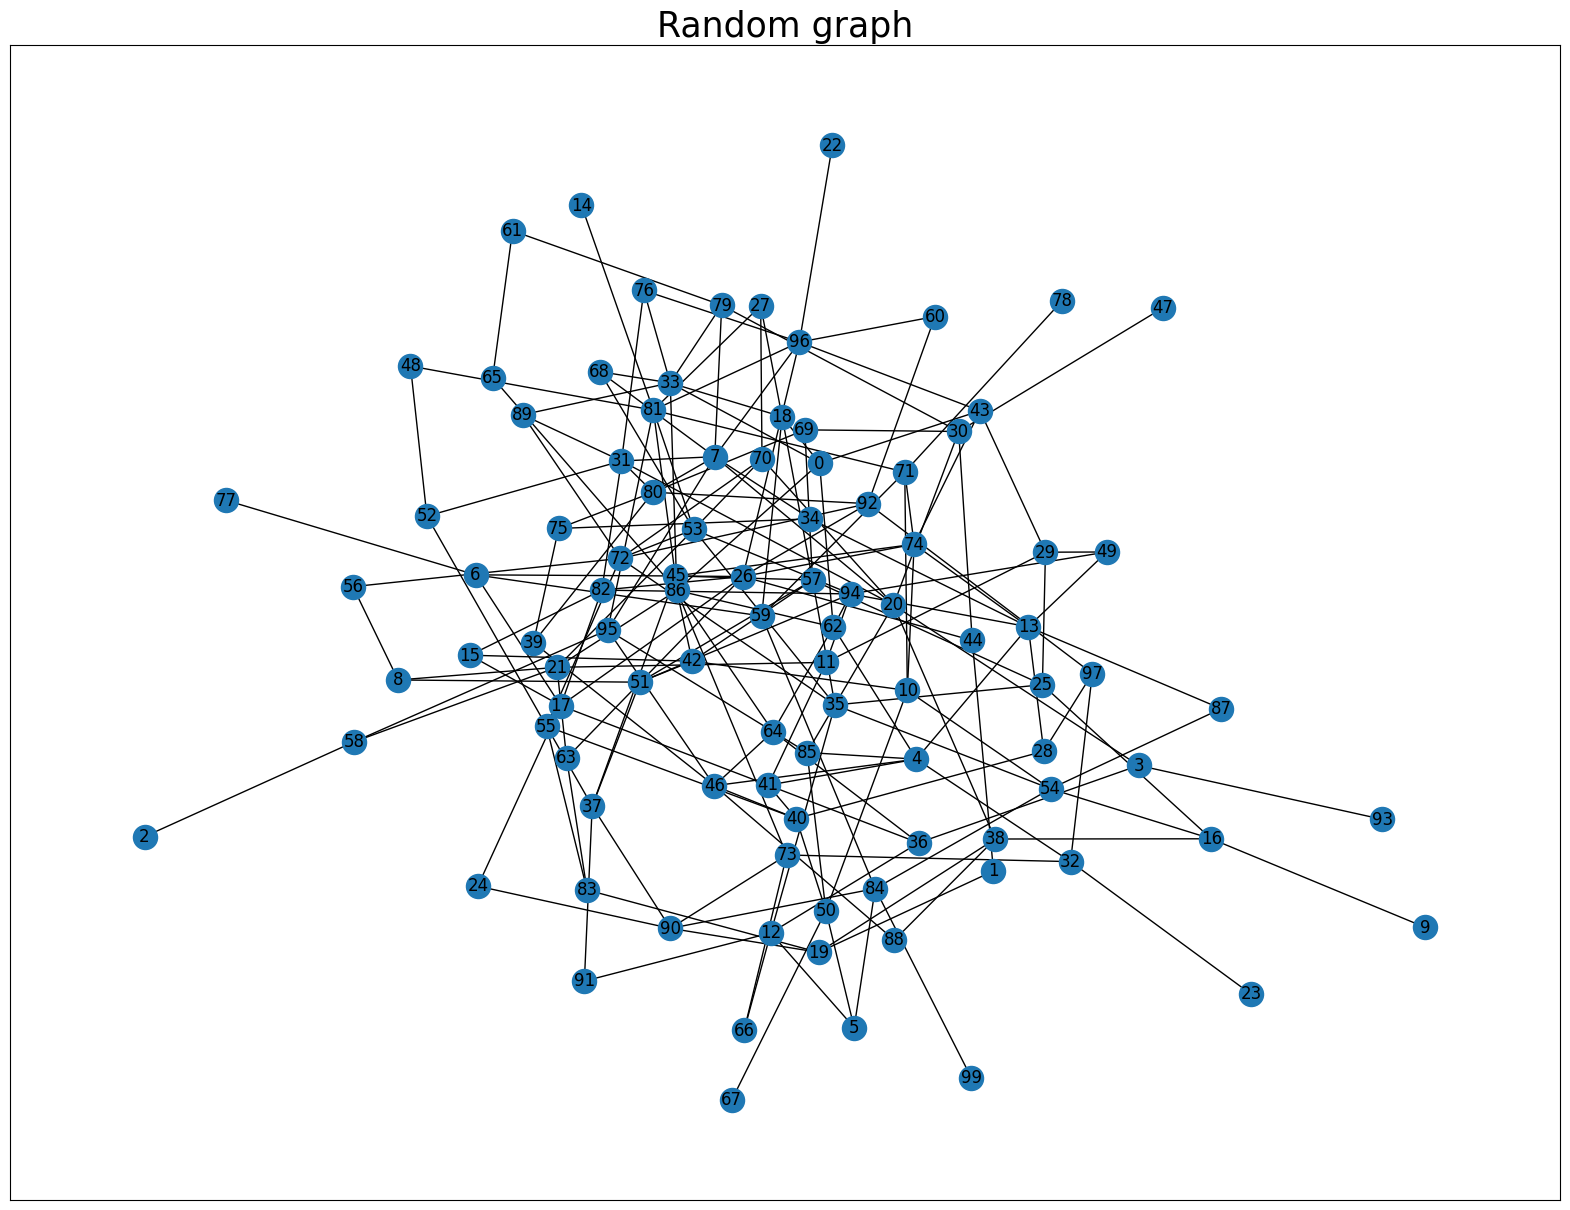

In [86]:
class GraphVisualization:
    def __init__(self, temp):
        self.visual = temp
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'Random graph', fontsize=25)
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()


lst = []
for k, v in adj_list.items():
    lst.extend([[k, i] for i in v])
G = GraphVisualization(lst)
G.visualize()

In [87]:
def DFS(out, visited, graph, node):
    if node not in visited:
        visited.add(node)
        out.append(node)
        for neighbour in graph[node]:
            DFS(out, visited, graph, neighbour)


def connected_components(adj_list):
    components = []
    visited = set()

    for i in range(len(adj_list)):
        out = []
        DFS(out, visited, adj_list,  i)
        if len(out) != 0:
            components.append(out)
    return components

In [88]:
from random import choices
con_comps = connected_components(adj_list)


print(f'Number of all connected components: {len(con_comps)}')

print('Print some examples:')
num_rows = 2
rand_idxs = np.random.choice(len(con_comps), num_rows, replace=False)
for idx in rand_idxs:
    print(con_comps[idx])

Number of all connected components: 2
Print some examples:
[98]
[0, 18, 27, 70, 20, 3, 36, 12, 5, 50, 10, 42, 15, 17, 6, 45, 26, 44, 1, 19, 38, 16, 9, 25, 29, 11, 21, 8, 51, 37, 55, 40, 28, 13, 4, 32, 23, 73, 66, 86, 33, 68, 7, 31, 52, 48, 81, 14, 53, 35, 54, 84, 59, 71, 74, 43, 96, 22, 60, 92, 72, 56, 89, 80, 39, 46, 64, 62, 94, 49, 82, 88, 95, 58, 2, 85, 75, 34, 69, 30, 47, 79, 61, 65, 57, 97, 76, 78, 90, 24, 99, 87, 41, 83, 63, 91, 77, 67, 93]


In [89]:
def BFS_SP(graph, start, dist):
    visited = []
     
    queue = [[start]]

    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        if node not in visited:
            neighbours = graph[node]
             
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                if neighbour == dist:
                    print("Shortest path = ", *new_path)
                    return
            visited.append(node)
 

    print("Path doesn't exist")
    return

In [90]:
BFS_SP(adj_list, 1, 99)

Shortest path =  1 19 90 84 99
